In [3]:
# import section
from pandas import read_csv
import numpy as np
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [1]:
def create_RNN(hidden_units, dense_units, input_shape, activation):

    # initiate the model for sequential data
    model = Sequential()

    # add model parameters to the simpleRNN layer
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,)) #)activation=activation[0]))

    # add model parameter to the dense layer
    model.add(Dense(units=dense_units,)) # activation=activation[1]))

    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

"""
    keras LSTM
    The function returns a model that includes a LSTM layer and a Dense layer
    for learning sequential data.
"""

def create_LSTM(hidden_units, dense_units, input_shape, activation):

    # initiate model
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,))# activation=activation[0]))
    model.add(Dense(units=dense_units,))# activation=activation[1]))
    model.compile(optimizer = "RMSprop", loss = 'mae')

    return model

"""
    keras LSTM
    The function returns a model that includes a GRU layer and a Dense layer
    for learning sequential data.
"""

def create_GRU(hidden_units, dense_units, input_shape, activation):

    # initiate model
    model = Sequential()
    model.add(GRU(hidden_units, input_shape=input_shape, ))#activation=activation[0]))
    model.add(Dense(units=dense_units, ))#activation=activation[1]))
    model.compile(optimizer = "RMSprop", loss = 'mae')

    return model

2023-05-08 15:38:46.175505: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
df = data_hist['Close']

In [4]:
df = yf.download("GOOG", start="2021-05-09", end="2023-05-08", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [5]:
def get_train_test(data, split_percent = 0.8):
    # read in the data
    #df = read_csv(url, usecols=[1], engine='python')
    # change the all the data to float type and add into new object
    #data = np.array(df.values.astype('float32'))
    # set the scaler for the data
    #scaler = MinMaxScaler(feature_range=(0,1))
    # scale the data
    #data = scaler.fit_transform(data).flatten()
    # variable to keep the length of the data
    n = len(data)
    # Potin for splitting data into train and time_steps
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

train_data, test_data, data = get_train_test(df['Close'].values)#process3_traces[0]

def get_XY(dat, time_steps):
    # indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 5
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [6]:
#model_type = "Simple RNN"
#model_type = "LSTM"
model_type = "GRU"

if model_type == "Simple RNN":
    model = create_RNN(hidden_units=32, dense_units=1, input_shape=(time_steps,1), activation=['relu', 'relu'])
elif model_type == "LSTM":
    model = create_LSTM(hidden_units=32, dense_units=1, input_shape=(time_steps,1), activation=['relu', 'relu'])
elif model_type == "GRU":
    model = create_GRU(hidden_units=32, dense_units=1, input_shape=(time_steps,1), activation=['relu', 'relu'])

# fitting models
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=0)

2023-05-08 15:40:35.736717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Compute and print the root mean square error
def print_error(trainY, testY, train_predict, test_predict):
    # error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # print RMSE
    print('Train RMSE %.3f RMSE' % (train_rmse))
    print('Test RMSE %.3f RMSE' % (test_rmse))

# make the predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# mean square error
print_error(trainY, testY, train_predict, test_predict)

5/5 [==============================] - 0s 1ms/step
Train RMSE 2.382 RMSE
Test RMSE 5.181 RMSE


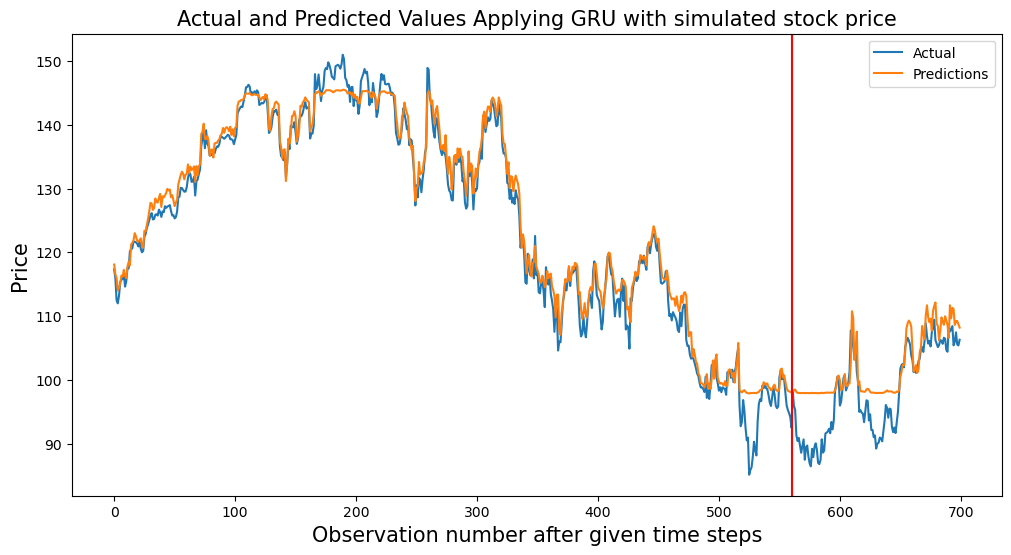

In [8]:
# view the result
def plot_result(trainY, testY, train_predict, test_precit):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows=len(actual)
    plt.figure(figsize=(12,6))
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color = 'r')
    plt.legend(['Actual', 'Predictions'],fontsize=10)
    plt.xlabel('Observation number after given time steps',fontsize=15)
    plt.ylabel('Price',fontsize=15)
    plt.title('Actual and Predicted Values Applying '+model_type + ' with simulated stock price', fontsize=15)
    plt.show()


plot_result(trainY, testY, train_predict, test_predict)